# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from seglearn.pipe import Pype
from seglearn.transform import FeatureRep, SegmentX
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#%matplotlib notebook

# Importing the Data

In [2]:
data_path = "./Data/WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt"

In [3]:
# Reading the first 3000 lines
df = pd.read_csv(data_path, sep=",", lineterminator=";", nrows=3000, header=None)

# Renaming the columns
columns = {0:"user_id", 1:"activity", 2:"timestamp", 3:"x_acceleration", 4:"y_acceleration", 5:"z_acceleration"}
df = df.rename(columns = columns)

In [4]:
df.head()

,user_id,activity,timestamp,x_acceleration,y_acceleration,z_acceleration
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [5]:
df.describe()

,user_id,timestamp,x_acceleration,y_acceleration,z_acceleration
count,3000.0,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,33.0,4.952345e+13,-0.429223,8.835978,1.682444
std,0.0,2.232021e+11,3.160440,5.064496,3.463754
min,33.0,4.910596e+13,-14.246883,-10.610250,-14.437569
25%,33.0,4.941118e+13,-1.947710,5.706926,0.040861
50%,33.0,4.959546e+13,-0.422231,8.676162,1.375655
75%,33.0,4.969650e+13,1.314364,12.149350,3.146300
max,33.0,4.983264e+13,12.299174,19.572440,16.167353


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3000 non-null   int64  
 1   activity        3000 non-null   object 
 2   timestamp       3000 non-null   int64  
 3   x_acceleration  3000 non-null   float64
 4   y_acceleration  3000 non-null   float64
 5   z_acceleration  3000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 140.8+ KB


# Ploting the Data

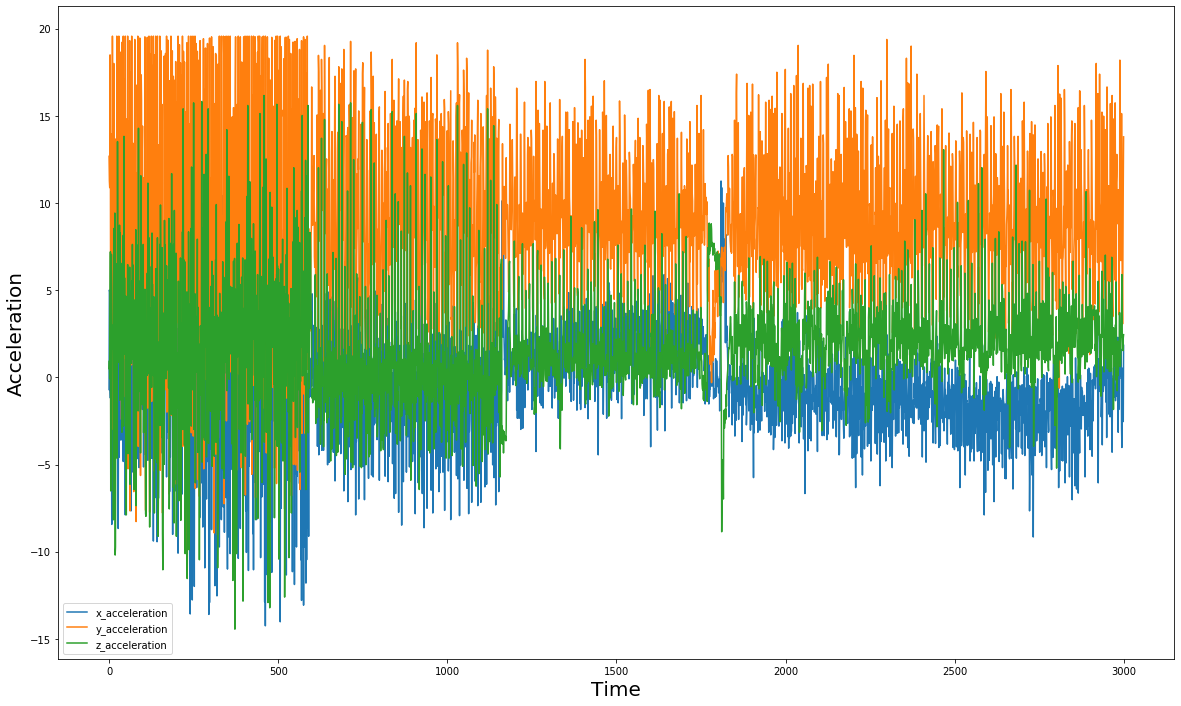

In [7]:
df[["x_acceleration", "y_acceleration", "z_acceleration"]].plot(figsize=(20, 12))
plt.xlabel("Time", fontsize=20)
plt.ylabel("Acceleration", fontsize=20)
plt.show()

# Seglearn 

In [9]:
#Sampling rate: 20Hz (1 sample every 50ms)
clf = Pype([('segment', SegmentX()),
            ('features', FeatureRep()),
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier()),
           ], memory=None)